<a href="https://colab.research.google.com/github/Apollo9999/Wave2WEBHACK/blob/main/EDA/Hemavathi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/Wave2web/'

'2019-20 Agri excel.xlsx'
'District-wise Depth to water Level and Distribution of Percentage of Wells for the Period of Premonsoon, 2018 in Karnataka (2).xlsx'
'DIST-WISE FRQ TEALE OF MAY2019 for website.xlsx.xlsx'
 GroundwaterLevelSpatialDataProject-master.zip
 Harangi.csv
 Hemavathi.csv
 kabini.csv
'Kerala-District wise - Rainfall Data(2016-2020)'
 Kerala-Rainfall-Historical.csv
 KRS.csv
'_Preparation for Concept Note.docx'
'rainfall-data-for-karnataka_2008-2018 (4).xls'
'Rainfall data maharshtra.xlsx'
 rainfall_vs_ksr.csv
 Wave2Web_hack_ppt.pptx
 Wave2WebHack_Team_Arghyam.csv
 wavetowebEDA.ipynb


In [4]:
hv = pd.read_csv('/content/gdrive/My Drive/Wave2web/Hemavathi.csv')

In [5]:
print("KRS : ", hv.shape)

KRS :  (3314, 10)


In [6]:
hv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314 entries, 0 to 3313
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SL_NO                3314 non-null   int64  
 1   RESERVOIR            3314 non-null   object 
 2   YEAR                 3314 non-null   int64  
 3   WEEK_NO              3314 non-null   int64  
 4   FLOW_DATE            3314 non-null   object 
 5   PRESENT_STORAGE_TMC  3314 non-null   float64
 6   RES_LEVEL_FT         3314 non-null   object 
 7   INFLOW_CUSECS        3314 non-null   object 
 8   OUTFLOW_CUECS        3314 non-null   float64
 9   UNIQUE_KEY           3314 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 259.0+ KB


In [7]:
hv.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,44,Hemavathi,2011,1,2011-01-01,31.60,2916.07,981,2001.0,HEMAVATHI-2011-01-01
1,45,Hemavathi,2011,1,2011-01-02,31.50,2915.95,849,1950.0,HEMAVATHI-2011-01-02
2,46,Hemavathi,2011,1,2011-01-03,31.39,2915.82,782,1950.0,HEMAVATHI-2011-01-03
3,47,Hemavathi,2011,1,2011-01-04,31.34,2915.77,695,1075.0,HEMAVATHI-2011-01-04
4,48,Hemavathi,2011,1,2011-01-05,31.34,2915.77,661,550.0,HEMAVATHI-2011-01-05


In [8]:
hv.FLOW_DATE = pd.to_datetime(hv.FLOW_DATE)

In [9]:
# convert object to numeric
hv['INFLOW_CUSECS'] = pd.to_numeric(hv.INFLOW_CUSECS, errors='coerce')

In [10]:
hv['RES_LEVEL_FT'] = pd.to_numeric(hv.RES_LEVEL_FT, errors='coerce')

In [11]:
hv.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,44,Hemavathi,2011,1,2011-01-01,31.60,2916.07,981.0,2001.0,HEMAVATHI-2011-01-01
1,45,Hemavathi,2011,1,2011-01-02,31.50,2915.95,849.0,1950.0,HEMAVATHI-2011-01-02
2,46,Hemavathi,2011,1,2011-01-03,31.39,2915.82,782.0,1950.0,HEMAVATHI-2011-01-03
3,47,Hemavathi,2011,1,2011-01-04,31.34,2915.77,695.0,1075.0,HEMAVATHI-2011-01-04
4,48,Hemavathi,2011,1,2011-01-05,31.34,2915.77,661.0,550.0,HEMAVATHI-2011-01-05


In [12]:
hv.describe()

,SL_NO,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS
count,3314.000000,3314.000000,3314.000000,3314.000000,3313.000000,3313.000000,3314.000000
mean,22231.489137,2015.732046,27.718769,16.509919,2889.474277,2528.182450,2509.093167
std,12763.731821,2.827683,14.922295,11.299499,20.923310,5540.813115,4120.933019
min,44.000000,2010.000000,1.000000,0.000000,2844.670000,0.000000,0.000000
25%,11064.250000,2014.000000,15.000000,6.400000,2870.030000,122.000000,200.000000
50%,22481.500000,2016.000000,28.000000,12.675000,2887.390000,533.000000,1000.000000
75%,33266.750000,2018.000000,41.000000,26.700000,2910.040000,2922.000000,4350.000000
max,43912.000000,2020.000000,52.000000,37.100000,2922.000000,113435.000000,97800.000000


In [14]:
hv.loc[hv['OUTFLOW_CUECS'] == 97800]


,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
1636,22209,Hemavathi,2019,32,2019-08-11,31.97,2918.0,101967.0,97800.0,HEMAVATHI-2019-08-11


https://weather.com/en-IN/india/news/news/2020-01-08-top-5-biggest-floods-affect-india-2019

Floods at above date. but there is no proof that kabini outflow is that much.


In [15]:
fig = px.box(x = hv["OUTFLOW_CUECS"] )
fig.show()

lot of outlier points are there.



2016    366
2019    365
2017    365
2015    365
2011    365
2018    365
2014    364
2020    333
2013    216
2012    208
2010      2
Name: YEAR, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



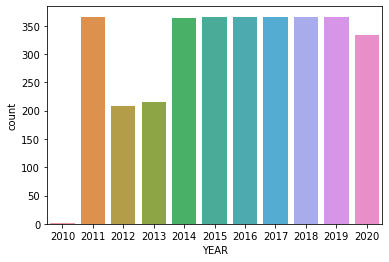

In [16]:
print(hv["YEAR"].value_counts())
sns.countplot(hv["YEAR"])


Only 2 months data and few less records for 2012 and 2013 for kabini

In [17]:
hv_indexed = hv.set_index('FLOW_DATE')

In [18]:
hv_indexed.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
FLOW_DATE,,,,,,,,,
2011-01-01,44,Hemavathi,2011,1,31.60,2916.07,981.0,2001.0,HEMAVATHI-2011-01-01
2011-01-02,45,Hemavathi,2011,1,31.50,2915.95,849.0,1950.0,HEMAVATHI-2011-01-02
2011-01-03,46,Hemavathi,2011,1,31.39,2915.82,782.0,1950.0,HEMAVATHI-2011-01-03
2011-01-04,47,Hemavathi,2011,1,31.34,2915.77,695.0,1075.0,HEMAVATHI-2011-01-04
2011-01-05,48,Hemavathi,2011,1,31.34,2915.77,661.0,550.0,HEMAVATHI-2011-01-05


In [19]:
fig = px.line(data_frame = hv, x = 'FLOW_DATE', y='INFLOW_CUSECS')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [20]:
hv_indexed['year'] = [x.year for x in hv_indexed.index]

In [21]:
fig = px.line(data_frame=hv_indexed, y='INFLOW_CUSECS', color='year')
fig.show()

In [22]:
weeklyhv = hv_indexed.groupby(['year','WEEK_NO']).mean()

In [24]:
weeklyhv.shape

(475, 6)

In [25]:
fig = px.line(data_frame=weeklyhv, y='INFLOW_CUSECS', color='YEAR')
fig.show()

In [26]:
fig = px.line(data_frame=weeklyhv, y='OUTFLOW_CUECS', color='YEAR')
fig.show()

In [27]:
fig = px.line(data_frame=weeklyhv, y='RES_LEVEL_FT', color='YEAR')
fig.show()

In [28]:
fig = px.line(data_frame=weeklyhv, y='PRESENT_STORAGE_TMC', color='YEAR')
fig.show()